# Preparando DataFrame

In [1]:
from subprocess import run, PIPE
run(["pip3", "install","pandas"])
run(["pip3", "install","numpy"])
run(["pip3", "install","seaborn"])
import zipfile as zf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import locale
import html

In [2]:
url = 'https://drive.google.com/u/2/uc?id=1xJefS_mZGQJRaP0LKaZwahZKCL6ggN_D;export=download&amp;confirm=t&amp;uuid=36dcd481-1658-4545-a7f1-c1c181154c89&amp;at=APZUnTXscmlCZE6PMWpWGNpf6DNw:1712587695396'

decoded_url = html.unescape(url)


In [3]:
req = requests.get(decoded_url)
open('vacinas_pb.zip', "wb").write(req.content)

1652

In [6]:
with open("vacinas_pb.zip", "rb") as f:
    print(f.read(2))  # Should print: b'PK' if it's a valid ZIP

b'<h'


In [4]:
z = zf.ZipFile('vacinas_pb.zip', mode="r")
print(z.namelist())

BadZipFile: File is not a zip file

In [28]:
z.extractall()

In [29]:
vacina_covid_pb = pd.DataFrame(pd.concat([pd.read_csv(arquivo, sep=";", encoding="latin", parse_dates = ["paciente_dataNascimento", "vacina_dataAplicacao"], low_memory=False) 
for arquivo in z.namelist()]))

ValueError: No objects to concatenate

# Manipulando os dados

## Retirando variaveis (colunas) não estatisticas

In [ ]:
vacina_covid_pb = vacina_covid_pb.drop("document_id", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("paciente_id", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("vacina_fabricante_referencia", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("vacina_codigo", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("estalecimento_noFantasia", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("vacina_categoria_codigo", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("paciente_racaCor_codigo", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("estabelecimento_uf", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("paciente_endereco_coIbgeMunicipio", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("paciente_endereco_coPais", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("vacina_lote", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("estabelecimento_razaoSocial", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("estabelecimento_valor", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("vacina_grupoAtendimento_codigo", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("paciente_endereco_cep", axis=1)
vacina_covid_pb = vacina_covid_pb.drop("estabelecimento_municipio_codigo", axis=1)

## Ajustando valores ausentes

In [ ]:
vacina_covid_pb["paciente_dataNascimento"].isna().value_counts()

False    10168950
True           17
Name: paciente_dataNascimento, dtype: int64

In [ ]:
retirar = vacina_covid_pb[vacina_covid_pb['paciente_dataNascimento'].isna() == True]
retirar
vacina_covid_pb = vacina_covid_pb.drop(retirar.index)

In [ ]:
retirar = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'].isna() == True]
vacina_covid_pb = vacina_covid_pb.drop(retirar.index)

In [ ]:
vacina_covid_pb["paciente_racaCor_valor"] = vacina_covid_pb["paciente_racaCor_valor"].str.replace("SEM INFORMACAO", "AUSENTE")
vacina_covid_pb = vacina_covid_pb.fillna("AUSENTE")

In [ ]:
vacina_covid_pb["paciente_idade"] = 2023 - vacina_covid_pb["paciente_dataNascimento"].dt.year
vacina_covid_pb["paciente_idade"] = vacina_covid_pb["paciente_idade"].astype(int)

In [ ]:
vacina_covid_pb = vacina_covid_pb[vacina_covid_pb['vacina_dataAplicacao'].dt.year >= 2020]
vacina_covid_pb['vacina_dataAplicacao'].dt.year.min()

2020

In [ ]:
vacina_covid_pb["paciente_nacionalidade_enumNacionalidade"].value_counts()

B          10154974
E              8484
AUSENTE        3759
None           1381
N                98
Name: paciente_nacionalidade_enumNacionalidade, dtype: int64

In [ ]:
vacina_covid_pb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10168696 entries, 0 to 2033535
Data columns (total 16 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   paciente_idade                            int32         
 1   paciente_dataNascimento                   datetime64[ns]
 2   paciente_enumSexoBiologico                object        
 3   paciente_racaCor_valor                    object        
 4   paciente_endereco_nmMunicipio             object        
 5   paciente_endereco_nmPais                  object        
 6   paciente_endereco_uf                      object        
 7   paciente_nacionalidade_enumNacionalidade  object        
 8   estabelecimento_municipio_nome            object        
 9   vacina_grupoAtendimento_nome              object        
 10  vacina_categoria_nome                     object        
 11  vacina_fabricante_nome                    object        
 12  vacina_dataAp

### Verificando a quantidade de valores ausentes em cada coluna

In [ ]:
vacina_covid_pb['estabelecimento_municipio_nome'].value_counts()

JOAO PESSOA                  1747965
CAMPINA GRANDE                974231
SANTA RITA                    292982
PATOS                         283976
BAYEUX                        195023
                              ...   
AREIA DE BARAUNAS               6122
QUIXABA                         5794
PARARI                          5749
RIACHO DE SANTO ANTONIO         5504
SAO JOSE DO BREJO DO CRUZ       4605
Name: estabelecimento_municipio_nome, Length: 223, dtype: int64

In [ ]:
vacina_covid_pb['vacina_grupoAtendimento_nome'].value_counts().head(50)

Pessoas de 18 a 64 anos                                                           5034573
Pessoas de 12 a 17 anos                                                            672840
Pessoas de 5 a 11 anos                                                             601099
HipertensÃ£o de difÃ­cil controle ou com complicaÃ§Ãµes/lesÃ£o de Ã³rgÃ£o alvo     459631
Faixa EtÃ¡ria                                                                      449264
Pessoas de 65 a 69 anos                                                            415458
Pessoas de 70 a 74 anos                                                            342934
Pessoas de 80 anos ou mais                                                         317263
Outros                                                                             255219
Pessoas de 75 a 79 anos                                                            241099
Ensino BÃ¡sico                                                                     229812
Diabetes M

In [ ]:
vacina_covid_pb['vacina_fabricante_nome'].value_counts()

PFIZER                                       4150951
ASTRAZENECA/FIOCRUZ                          2782328
SINOVAC/BUTANTAN                             2153891
JANSSEN                                       495366
Pendente IdentificaÃ§Ã£o                      183298
ASTRAZENECA                                   127022
PFIZER - PEDIÃTRICA                          123417
PFIZER - PEDIÃTRICA MENOR DE 5 ANOS           98497
PFIZER - PEDI?TRICA                            47947
Pendente Identifica??o                          4888
SINOVAC                                         1049
FUNDACAO OSWALDO CRUZ                             22
PFIZER MANUFACTURING BELGIUM NV - BELGICA         13
JANSSEN PHARMACEUTICA NV                           4
SINOVAC LIFE SCIENCES CO., LTD                     3
Name: vacina_fabricante_nome, dtype: int64

In [ ]:
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("PFIZER - PEDIÃTRICA", "PFIZER")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("PFIZER MENOR DE 5 ANOS", "PFIZER")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("PFIZER - PEDIÃTRICA MENOR DE 5 ANOS", "PFIZER")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("PFIZER - PEDI?TRICA", "PFIZER")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("PFIZER MANUFACTURING BELGIUM NV - BELGICA", "PFIZER")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("Pendente IdentificaÃ§Ã£o", "AUSENTE")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("Pendente Identifica??o", "AUSENTE")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("ASTRAZENECA/FIOCRUZ", "ASTRAZENECA")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("JANSSEN PHARMACEUTICA NV", "JANSSEN")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("SINOVAC LIFE SCIENCES CO., LTD", "SINOVAC")
# vacina_covid_pb['vacina_fabricante_nome'] = vacina_covid_pb['vacina_fabricante_nome'].str.replace("SINOVAC/BUTANTAN", "SINOVAC")

In [ ]:
categorias = ["PFIZER", "ASTRAZENECA", "SINOVAC", "JANSSEN", "FUNDACAO OSWALDO CRUZ"]

conditions = [
    (vacina_covid_pb['vacina_fabricante_nome'].str.contains("PFIZER")),
    (vacina_covid_pb['vacina_fabricante_nome'].str.contains("ASTRAZENECA")),
    (vacina_covid_pb['vacina_fabricante_nome'].str.contains("SINOVAC")),
    (vacina_covid_pb['vacina_fabricante_nome'].str.contains("JANSSEN")),
    (vacina_covid_pb['vacina_fabricante_nome'].str.contains("FUNDACAO OSWALDO CRUZ")),
]

In [ ]:
vacina_covid_pb['vacina_fabricante_nome'] = np.select(conditions, categorias, default="AUSENTE")

In [ ]:
vacina_covid_pb['vacina_nome'].value_counts()

COVID-19 PFIZER - COMIRNATY                                3788371
COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD                  2782350
COVID-19 SINOVAC/BUTANTAN - CORONAVAC                      2153894
COVID-19 JANSSEN - Ad26.COV2.S                              495370
COVID-19 PFIZER - COMIRNATY BIVALENTE                       362592
COVID-19 PEDIÃTRICA - PFIZER COMIRNATY                     249192
COVID-19 ASTRAZENECA - ChAdOx1-S                            127022
COVID-19 PFIZER - COMIRNATY PEDIÃTRICA                     103885
COVID-19 PFIZER - COMIRNATY PEDIÃTRICA MENOR DE 5 ANOS      98497
COVID-19 SINOVAC - CORONAVAC                                  6724
AUSENTE                                                        799
Name: vacina_nome, dtype: int64

In [ ]:
vacina_covid_pb["paciente_racaCor_valor"].value_counts()

PARDA       3853314
BRANCA      2435002
AMARELA     2108740
AUSENTE     1346853
PRETA        379057
INDIGENA      45730
Name: paciente_racaCor_valor, dtype: int64

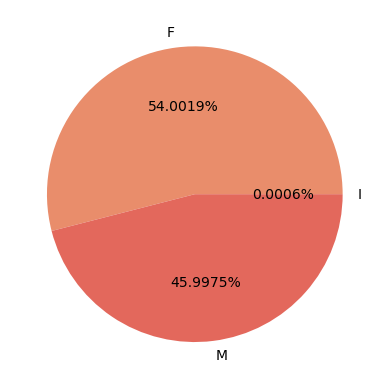

In [ ]:
colors = sns.color_palette('flare')[0:3]
labels = ['F', 'M', 'I']
plt.pie(vacina_covid_pb['paciente_enumSexoBiologico'].value_counts(), labels = labels, colors = colors, autopct='%.4f%%')
plt.show()

In [ ]:
municipios_maisVacinados = vacina_covid_pb.value_counts('estabelecimento_municipio_nome')
municipios_maisVacinados = municipios_maisVacinados[:5]

<AxesSubplot:xlabel='estabelecimento_municipio_nome'>

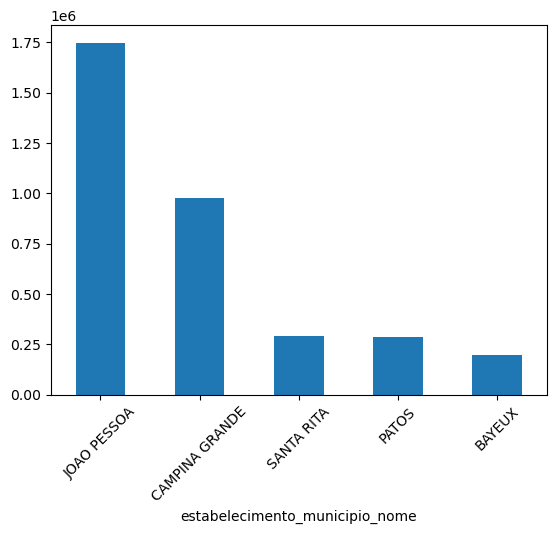

In [ ]:
municipios_maisVacinados.plot(kind="bar", rot=45)

In [ ]:
vaci_2020 = vacina_covid_pb[vacina_covid_pb['vacina_dataAplicacao'].dt.year == 2020]

In [ ]:
meses = ['Jan', 'Fev', 'Mar', 'Abri', 'Maio', 'Jun', 'Jul', 'Agost', 'Set', 'Out', 'Nov', 'Dez']
vaci_2020_meses = []
for i in range(1, 13):
    count = len(vaci_2020[vaci_2020['vacina_dataAplicacao'].dt.month == i])
    vaci_2020_meses.append(count)
vaci_2020_meses

[2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 3]

In [ ]:
vaci_2021 = vacina_covid_pb[vacina_covid_pb['vacina_dataAplicacao'].dt.year == 2021]

In [ ]:
vaci_2021_meses = []
for i in range(1, 13):
    count = len(vaci_2021[vaci_2021['vacina_dataAplicacao'].dt.month == i])
    vaci_2021_meses.append(count)
vaci_2021_meses

[61814,
 106584,
 433085,
 456859,
 351304,
 499491,
 632616,
 988147,
 829716,
 801898,
 788077,
 533441]

In [ ]:
vaci_2022 = vacina_covid_pb[vacina_covid_pb['vacina_dataAplicacao'].dt.year == 2022]

In [ ]:
vaci_2022_meses = []
for i in range(1, 13):
    count = len(vaci_2022[vaci_2022['vacina_dataAplicacao'].dt.month == i])
    vaci_2022_meses.append(count)
vaci_2022_meses

[520115,
 535769,
 561537,
 258993,
 186405,
 259110,
 295565,
 158290,
 54108,
 31127,
 118803,
 47327]

In [ ]:
vaci_2023 = vacina_covid_pb[vacina_covid_pb['vacina_dataAplicacao'].dt.year == 2023]

In [ ]:
vaci_2023_meses = []
for i in range(1, 13):
    count = len(vaci_2023[vaci_2023['vacina_dataAplicacao'].dt.month == i])
    vaci_2023_meses.append(count)
vaci_2023_meses

[33548, 124681, 236415, 116198, 147661, 0, 0, 0, 0, 0, 0, 0]

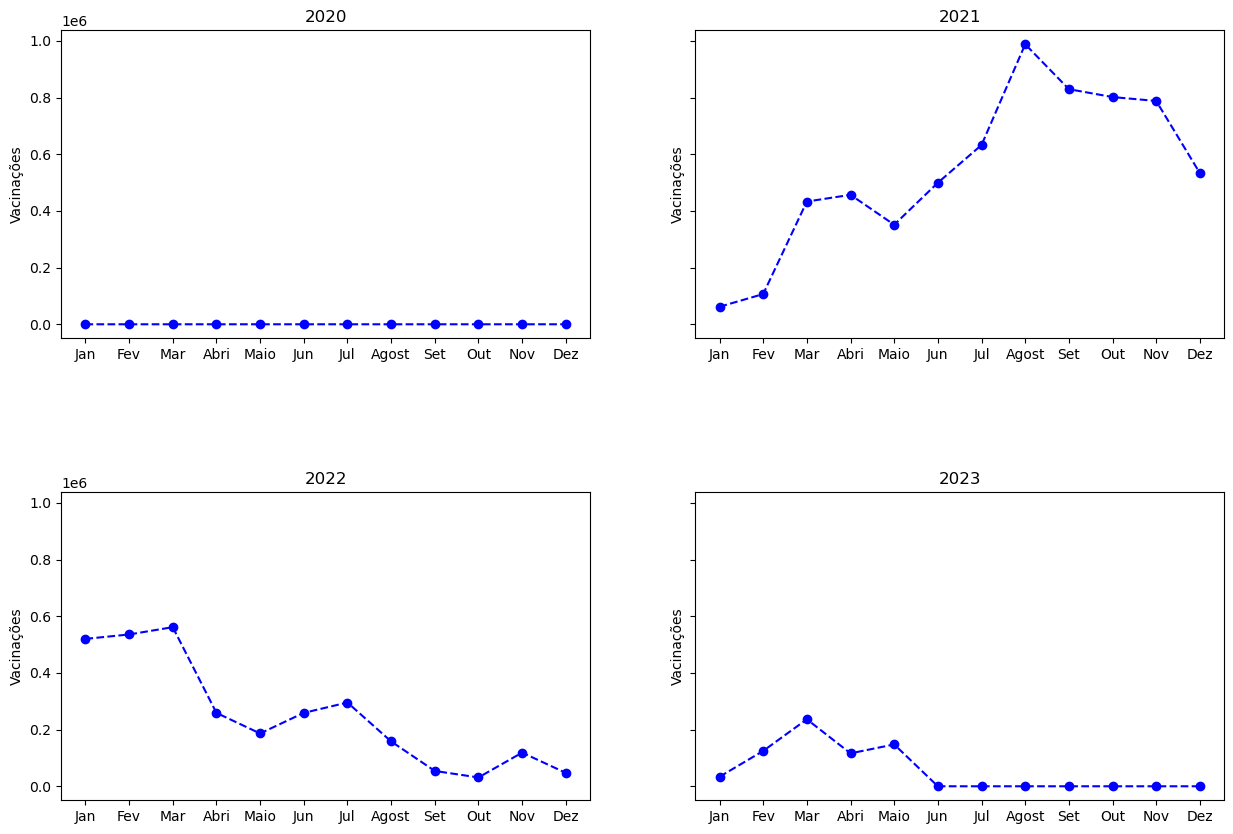

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

ax[0, 0].plot(meses, vaci_2020_meses, color='b', marker="o", linestyle="--")
ax[0, 1].plot(meses, vaci_2021_meses, color='b', marker="o", linestyle="--")
ax[1, 0].plot(meses, vaci_2022_meses, color='b', marker="o", linestyle="--")
ax[1, 1].plot(meses, vaci_2023_meses, color='b', marker="o", linestyle="--")

ax[0, 0].set_title('2020')
ax[0, 1].set_title('2021')
ax[1, 0].set_title('2022')
ax[1, 1].set_title('2023')


ax[0, 0].set_ylabel('Vacinações')
ax[1, 0].set_ylabel('Vacinações')
ax[0, 1].set_ylabel('Vacinações')
ax[1, 1].set_ylabel('Vacinações')

plt.show()

<AxesSubplot:>

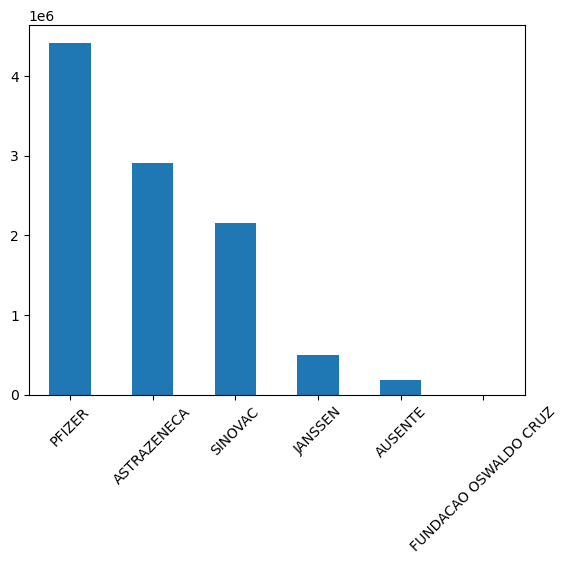

In [ ]:
vacina_covid_pb['vacina_fabricante_nome'].value_counts().plot(kind="bar", rot=45)

In [ ]:
categorias = ["0 - 10", "11 - 20", "21 - 30", "31 - 40", "41 - 50",
              "51 - 60", "61 - 70", "71 - 80", "81 - 90", "91 - 100",
              "101 - 110", "111 - 120", "121 - 130", "131 - 140"]

conditions = [
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 0, vacina_covid_pb['paciente_idade'] <= 10),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 11, vacina_covid_pb['paciente_idade'] <= 20),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 21, vacina_covid_pb['paciente_idade'] <= 30),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 31, vacina_covid_pb['paciente_idade'] <= 40),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 41, vacina_covid_pb['paciente_idade'] <= 50),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 51, vacina_covid_pb['paciente_idade'] <= 60),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 61, vacina_covid_pb['paciente_idade'] <= 70),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 71, vacina_covid_pb['paciente_idade'] <= 80),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 81, vacina_covid_pb['paciente_idade'] <= 90),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 91, vacina_covid_pb['paciente_idade'] <= 100),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 101, vacina_covid_pb['paciente_idade'] <= 110),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 111, vacina_covid_pb['paciente_idade'] <= 120),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 121, vacina_covid_pb['paciente_idade'] <= 130),
    np.logical_and(vacina_covid_pb['paciente_idade'] >= 131, vacina_covid_pb['paciente_idade'] <= 140)
]

vacina_covid_pb['paciente_faixaEtaria'] = np.select(conditions, categorias, default="AUSENTE")

In [ ]:
#vacina_covid_pb[["paciente_idade", "paciente_faixaEtaria"]].head(50)

In [ ]:
#vacina_covid_pb['paciente_idade'].max()

In [ ]:
vacina_covid_pb['vacina_descricao_dose'].value_counts()

1Âª Dose                  3570226
2Âª Dose                  3255897
ReforÃ§o                  2429158
2Âº ReforÃ§o               729333
Dose Adicional              58912
Dose                        47174
1Âº ReforÃ§o                32639
3Âª Dose                    16629
1Âª Dose RevacinaÃ§Ã£o       7609
2Âª Dose RevacinaÃ§Ã£o       6961
3Âº ReforÃ§o                 4332
4Âª Dose RevacinaÃ§Ã£o       3855
3Âª Dose RevacinaÃ§Ã£o       3000
RevacinaÃ§Ã£o                1714
Dose Inicial                 1062
Ãnica                         86
4Âª Dose                       85
5Âª Dose RevacinaÃ§Ã£o         18
2Âª Dose Fracionada             3
1Âª Dose Fracionada             3
Name: vacina_descricao_dose, dtype: int64

In [ ]:
categorias = ["1º Dose Reforço", "2º Dose Reforço", "3º Dose Reforço",
             "1º Dose Revacinação", "2º Dose Revacinação", "3º Dose Revacinação", 
              "4º Dose Revacinação", "5º Dose Revacinação", "Dose Adicional", 
              "Dose Inicial", "Unica", "1º Dose Fracionada", "2º Dose Fracionada", "Reforço",
             "Revacinação", "1º Dose", "2º Dose", "3º Dose", "4º Dose"]

conditions = [
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("1Âº ReforÃ§o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("2Âº ReforÃ§o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("3Âº ReforÃ§o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("1Âª Dose RevacinaÃ§Ã£o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("2Âª Dose RevacinaÃ§Ã£o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("3Âª Dose RevacinaÃ§Ã£o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("4Âª Dose RevacinaÃ§Ã£o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("5Âª Dose RevacinaÃ§Ã£o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("Dose Adicional")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("Dose Inicial")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("nica")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("1Âª Dose Fracionada")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("2Âª Dose Fracionada")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("ReforÃ§o")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("RevacinaÃ§Ã£o")),
     (vacina_covid_pb['vacina_descricao_dose'].str.contains("1Âª Dose")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("2Âª Dose")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("3Âª Dose")),
    (vacina_covid_pb['vacina_descricao_dose'].str.contains("4Âª Dose")),
]

In [ ]:
vacina_covid_pb['vacina_descricao_dose'] = np.select(conditions, categorias, default="1º Dose")

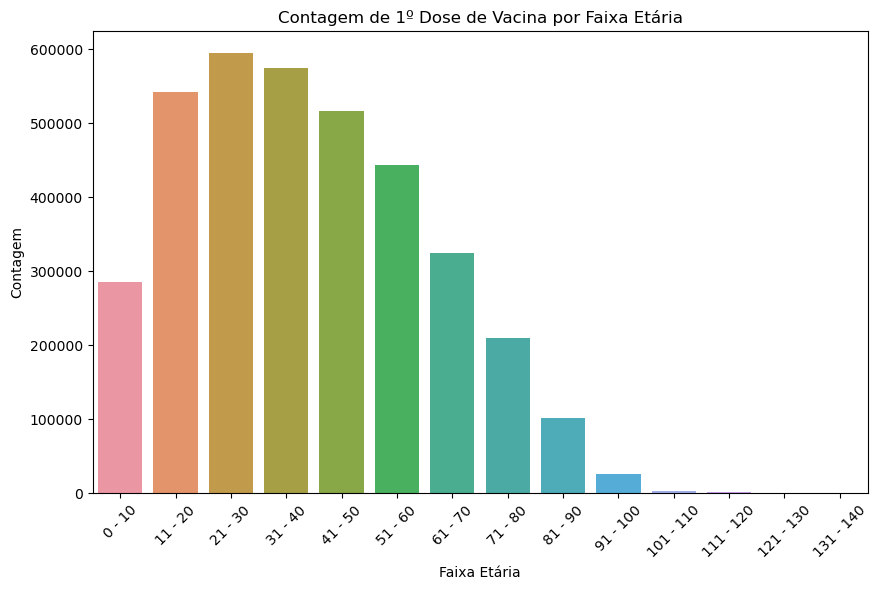

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '1º Dose']

# Definir a lista de faixas etárias em ordem alfabética
faixas_etarias = ['0 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70',
                  '71 - 80', '81 - 90', '91 - 100', '101 - 110', '111 - 120', '121 - 130', '131 - 140']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 1º Dose de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

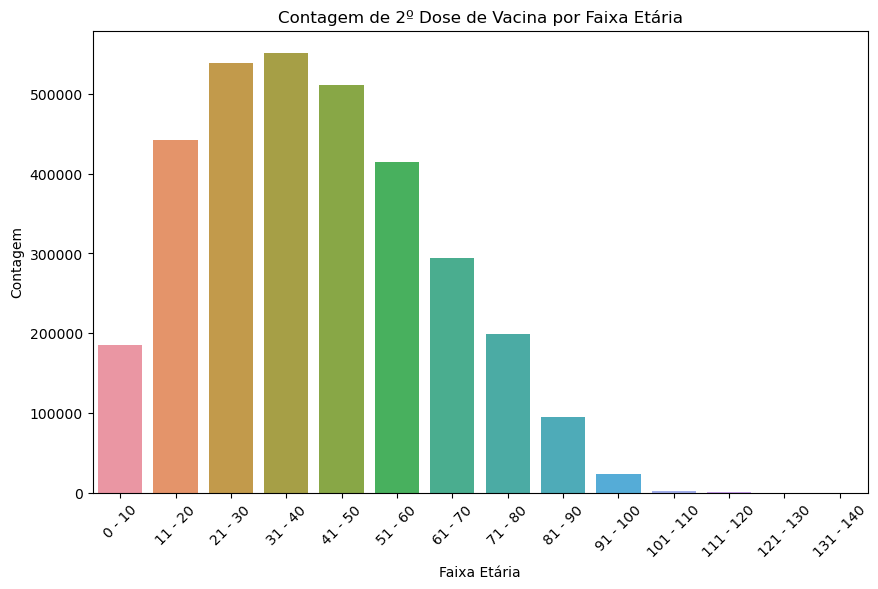

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '2º Dose']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 2º Dose de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

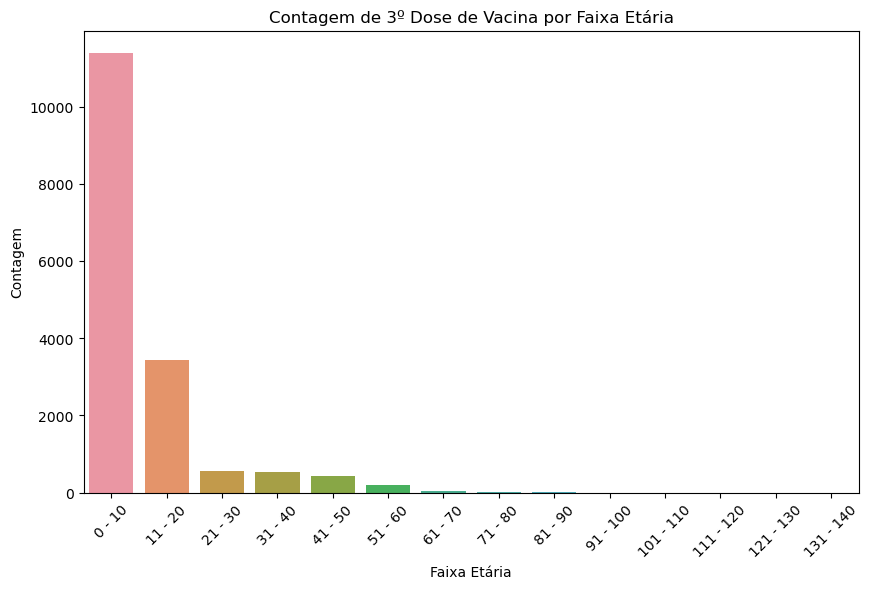

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '3º Dose']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 3º Dose de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

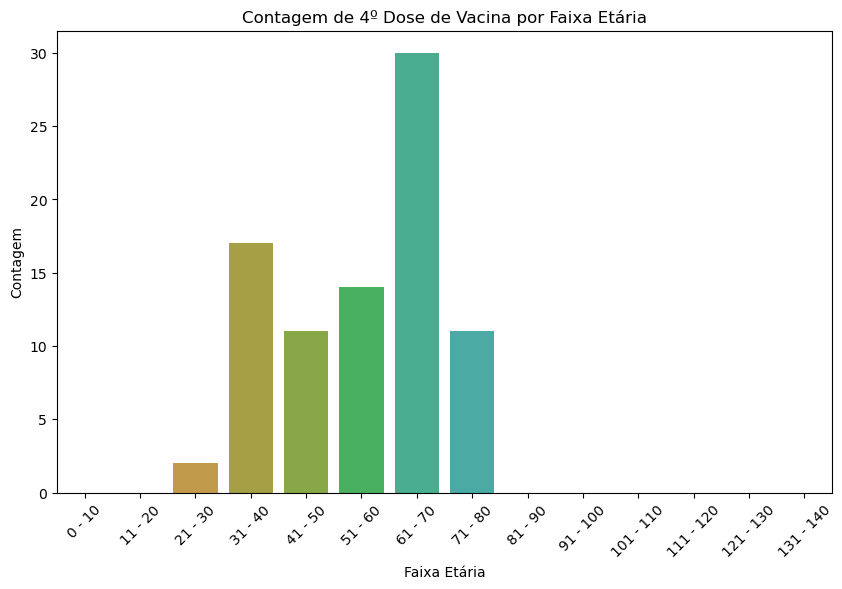

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '4º Dose']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 4º Dose de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

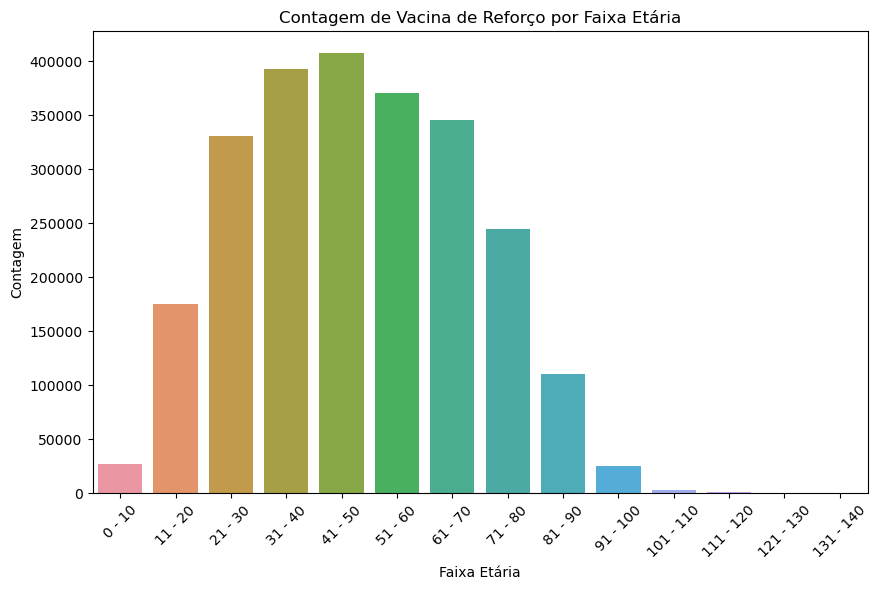

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == 'Reforço']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Vacina de Reforço por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

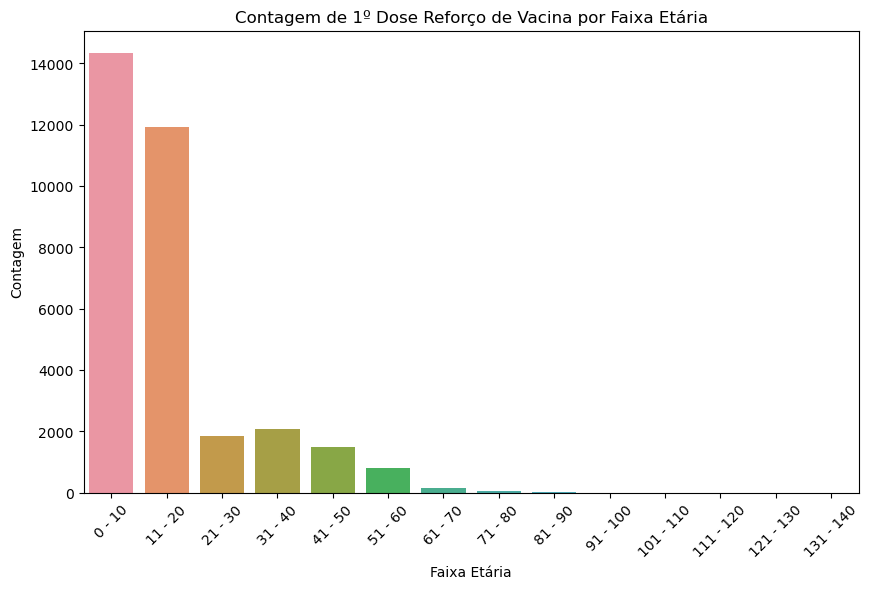

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '1º Dose Reforço']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 1º Dose Reforço de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

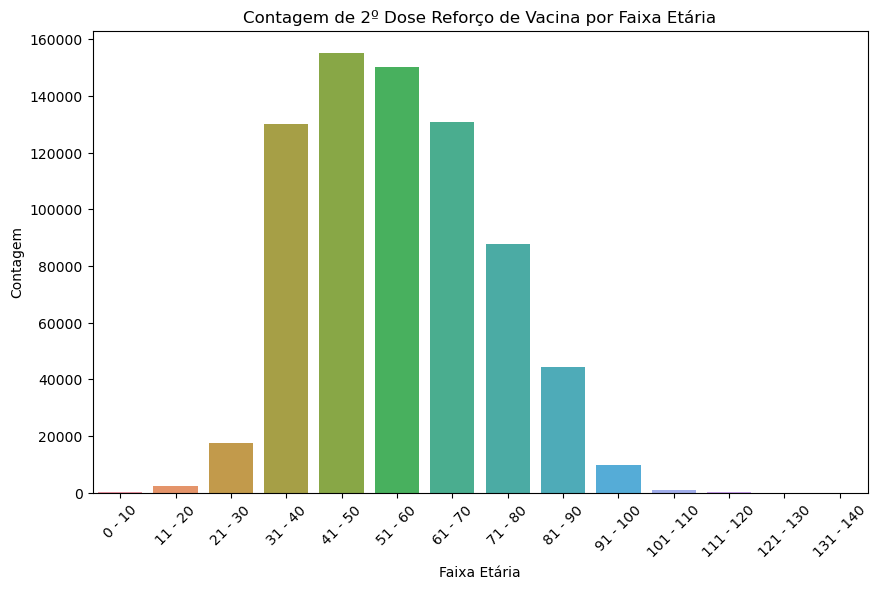

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '2º Dose Reforço']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 2º Dose Reforço de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

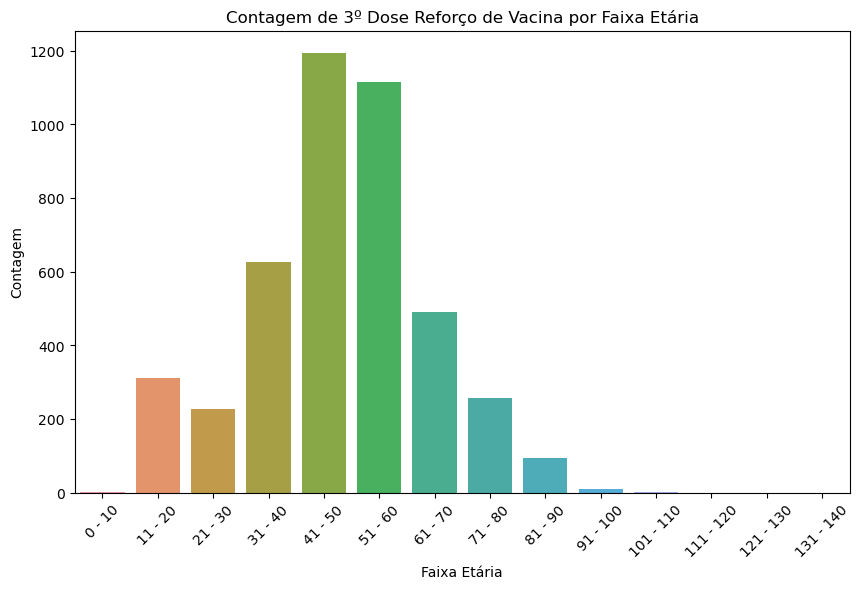

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '3º Dose Reforço']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 3º Dose Reforço de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

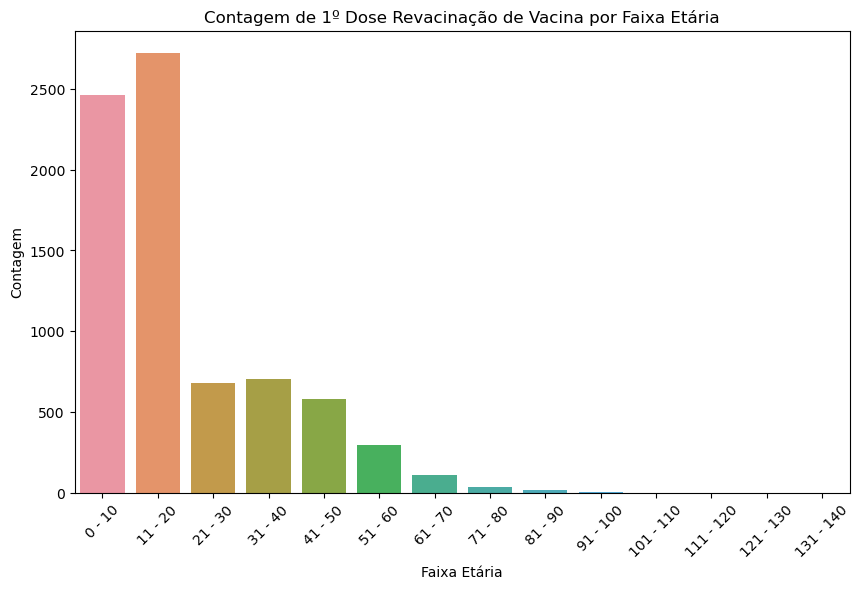

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '1º Dose Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 1º Dose Revacinação de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

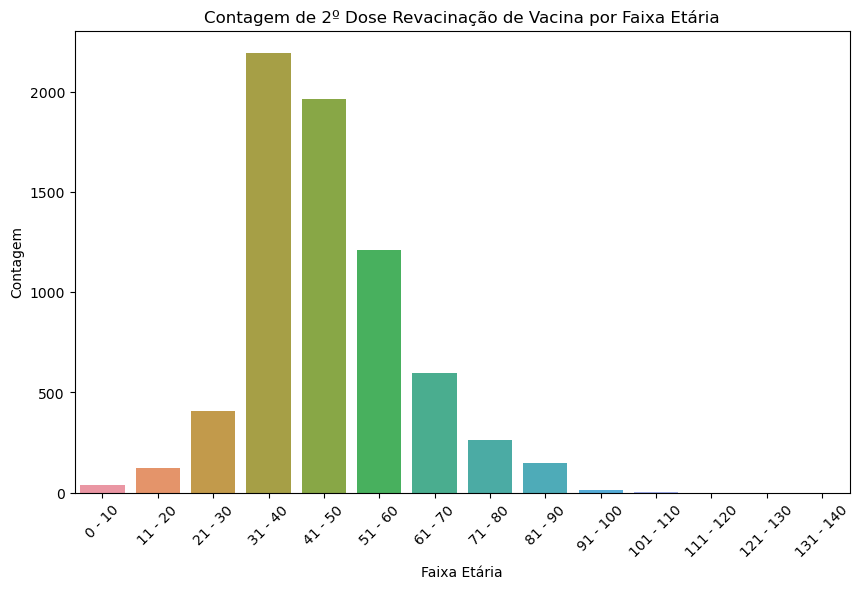

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '2º Dose Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 2º Dose Revacinação de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

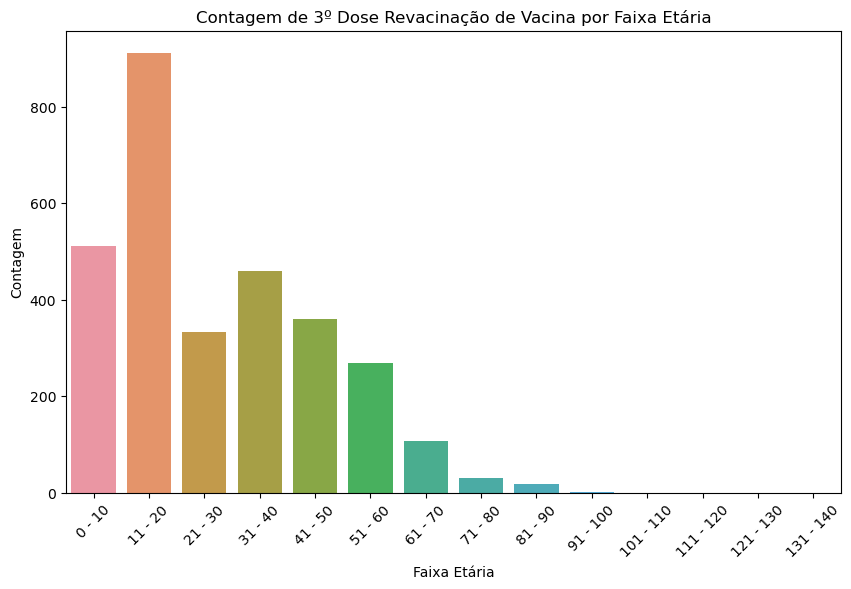

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '3º Dose Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 3º Dose Revacinação de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

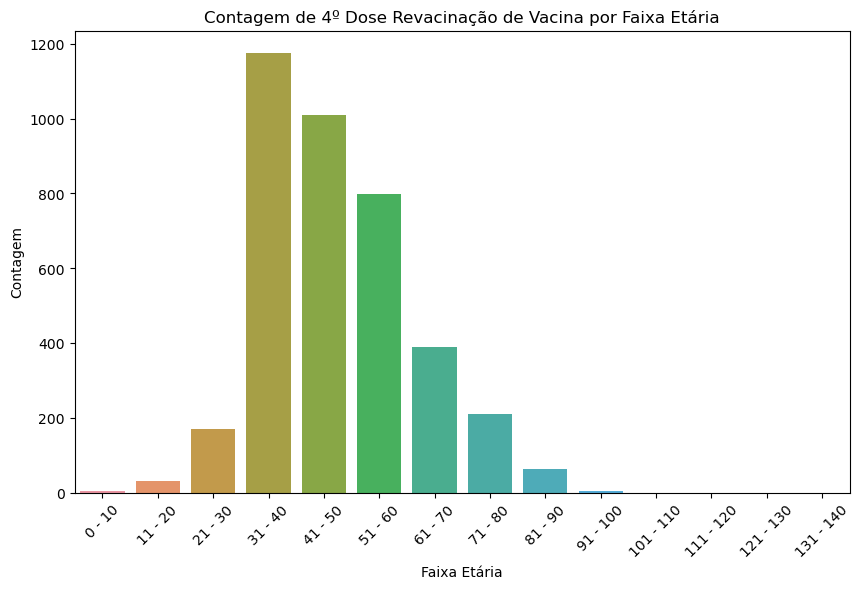

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '4º Dose Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 4º Dose Revacinação de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

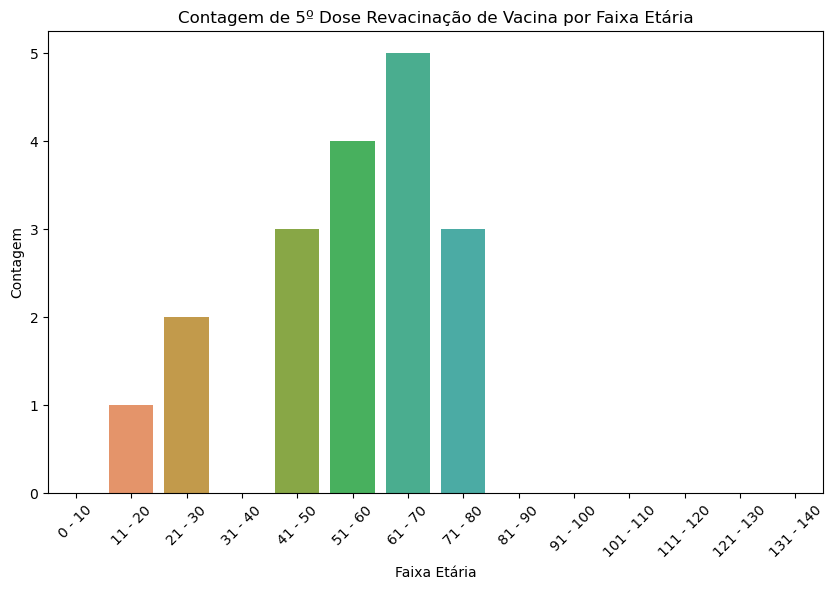

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '5º Dose Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de 5º Dose Revacinação de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

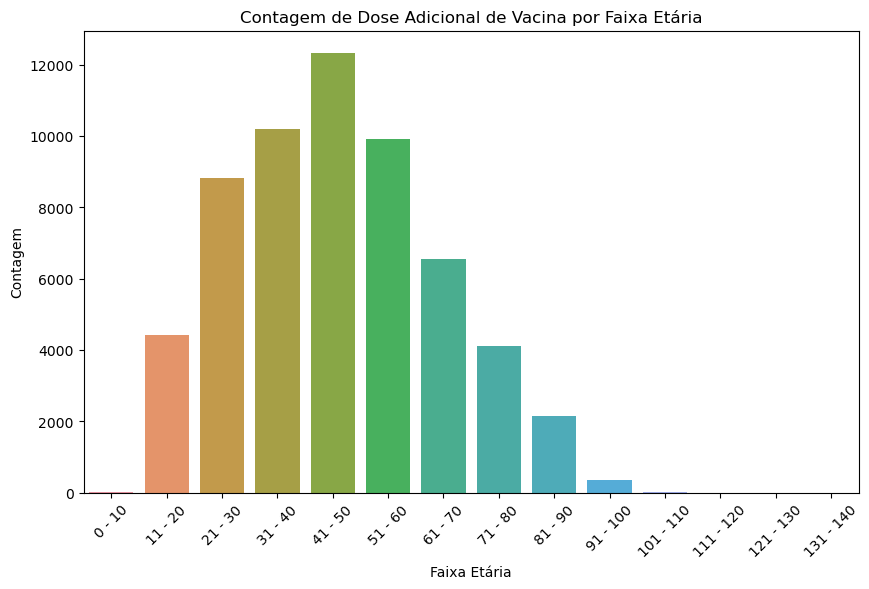

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == 'Dose Adicional']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Dose Adicional de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

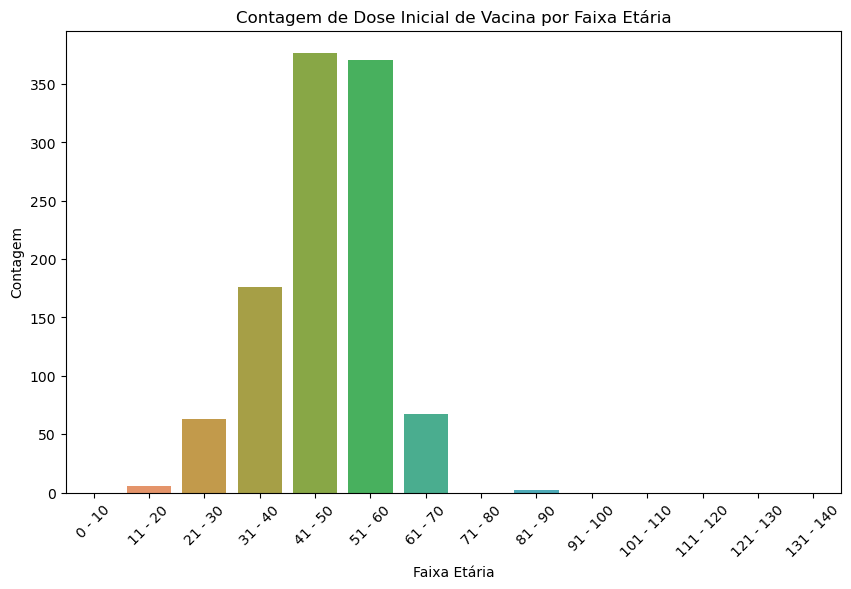

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == 'Dose Inicial']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Dose Inicial de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

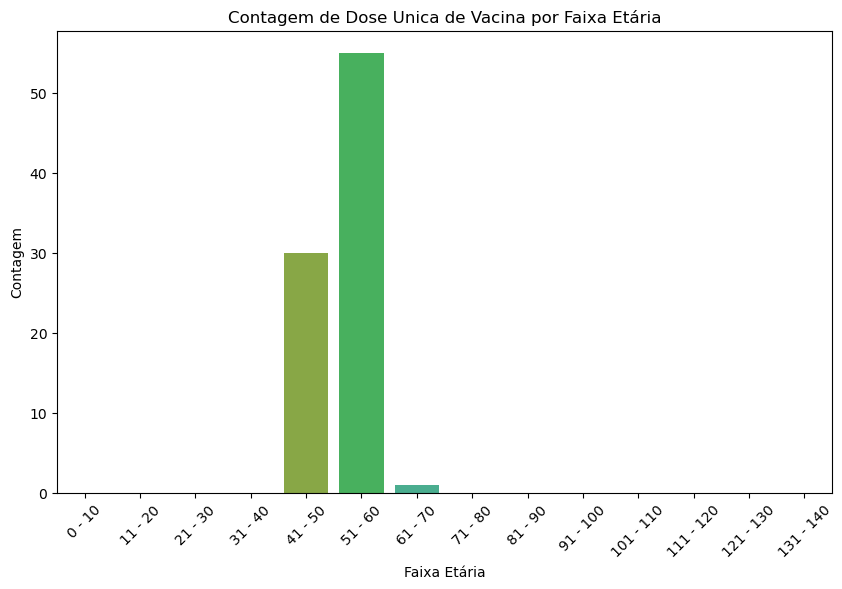

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == 'Unica']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Dose Unica de Vacina por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

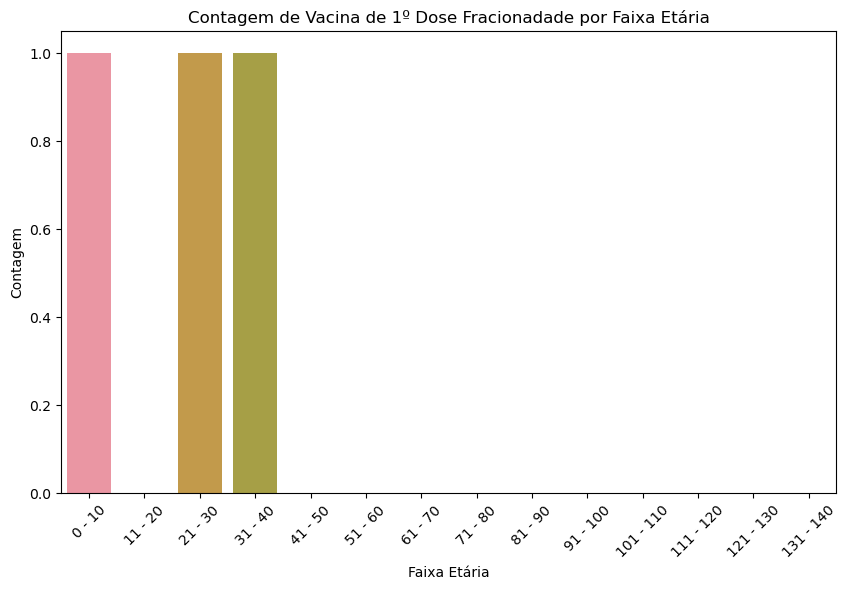

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '1º Dose Fracionada']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Vacina de 1º Dose Fracionadade por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

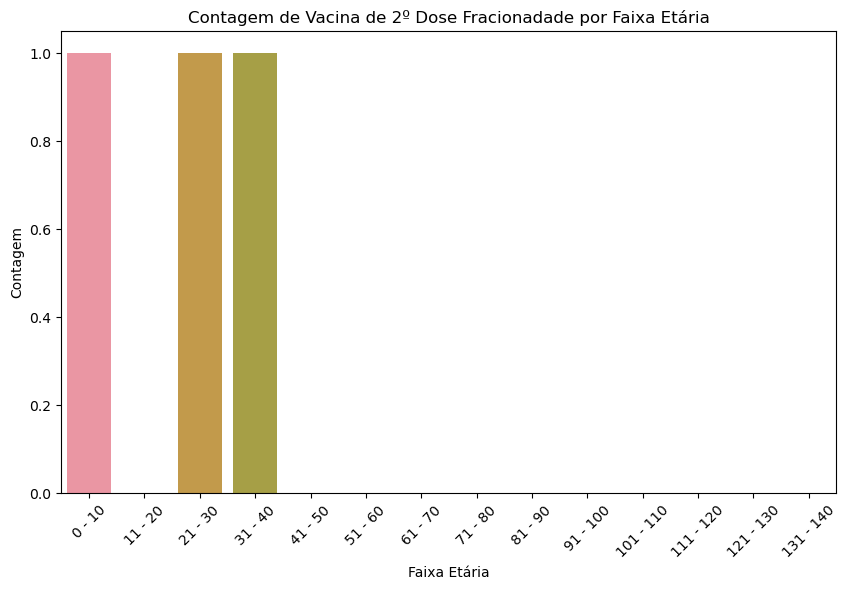

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == '2º Dose Fracionada']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem de Vacina de 2º Dose Fracionadade por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

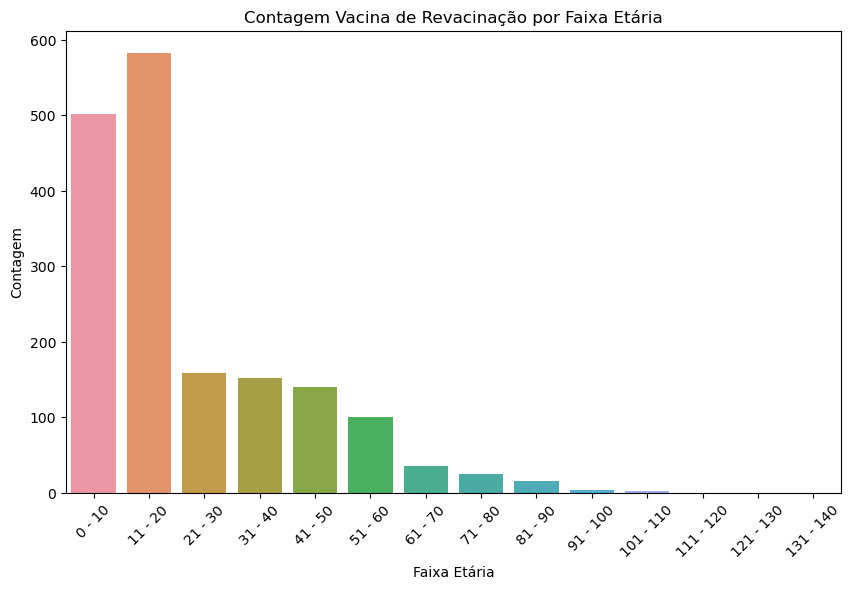

In [ ]:
# Filtrar os dados para o tipo de dose "1º Dose"
dados_filtrados = vacina_covid_pb[vacina_covid_pb['vacina_descricao_dose'] == 'Revacinação']

# Calcular a contagem de ocorrências de cada faixa etária
contagem_faixa_etaria = dados_filtrados['paciente_faixaEtaria'].value_counts()

# Ordenar a contagem de acordo com a ordem das faixas etárias
contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras para a faixa etária e o tipo de dose "1º Dose"
sns.barplot(x=contagem_faixa_etaria.index, y=contagem_faixa_etaria)

# Configurar os eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Contagem Vacina de Revacinação por Faixa Etária')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [ ]:
vacina_covid_pb.columns

Index(['paciente_idade', 'paciente_dataNascimento',
       'paciente_enumSexoBiologico', 'paciente_racaCor_valor',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_nacionalidade_enumNacionalidade',
       'estabelecimento_municipio_nome', 'vacina_grupoAtendimento_nome',
       'vacina_categoria_nome', 'vacina_fabricante_nome',
       'vacina_dataAplicacao', 'vacina_descricao_dose', 'vacina_nome',
       'sistema_origem', 'paciente_faixaEtaria'],
      dtype='object')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['paciente_endereco_nmMunicipio'] == 'AUSENTE')

paciente_endereco_nmMunicipio
False    10110927
True        57769
dtype: int64

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['paciente_endereco_nmPais'] == 'AUSENTE')

paciente_endereco_nmPais
False    10110948
True        57748
dtype: int64

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['paciente_endereco_uf'] == 'AUSENTE')

paciente_endereco_uf
False    10110919
True        57777
dtype: int64

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['paciente_nacionalidade_enumNacionalidade'] == 'AUSENTE')

paciente_nacionalidade_enumNacionalidade
False    10164937
True         3759
dtype: int64

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['estabelecimento_municipio_codigo'] == 'AUSENTE')

NameError: name 'vacina_covid_pb' is not defined

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['estabelecimento_municipio_nome'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['vacina_grupoAtendimento_nome'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['vacina_categoria_nome'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['vacina_fabricante_nome'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['vacina_descricao_dose'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.value_counts(vacina_covid_pb['vacina_nome'] == 'AUSENTE')

In [ ]:
vacina_covid_pb.to_csv("vacina_covid_pb")